# Initialize Library

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler


from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings(action='once')
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Init

## Initialize Dataframe

In [204]:
df = pd.read_csv('german.data', delimiter=" ", header=None)
df.columns = [
  "status_existing_checking",
  "duration_month",
  "credit_history",
  "purpose",
  "credit_amount",
  "saving account/bonds",
  "employment_duration",
  "installment_rate",
  "status_sex",
  "other_debtors_guarantors",
  "duration_residency",
  "property",
  "age",
  "installment_plans",
  "housing_status",
  "number_of_existing_credits",
  "job",
  "number_of_people_to_provide_maintenance",
  "phone",
  "is_foreign_worker",
  "target"
]
df.sample(5)

,status_existing_checking,duration_month,credit_history,purpose,credit_amount,saving account/bonds,employment_duration,installment_rate,status_sex,other_debtors_guarantors,...,property,age,installment_plans,housing_status,number_of_existing_credits,job,number_of_people_to_provide_maintenance,phone,is_foreign_worker,target
993,A11,36,A32,A42,3959,A61,A71,4,A93,A101,...,A122,30,A143,A152,1,A174,1,A192,A201,1
757,A13,15,A34,A43,1271,A65,A73,3,A93,A101,...,A124,39,A143,A153,2,A173,1,A192,A201,2
380,A11,20,A32,A42,2212,A65,A74,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A192,A201,1
756,A13,6,A34,A40,1299,A61,A73,1,A93,A101,...,A121,74,A143,A152,3,A171,2,A191,A202,1
283,A14,15,A34,A42,1520,A65,A75,4,A93,A101,...,A122,63,A143,A152,1,A173,1,A191,A201,1


## Descriptive Statistic

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   status_existing_checking                 1000 non-null   object
 1   duration_month                           1000 non-null   int64 
 2   credit_history                           1000 non-null   object
 3   purpose                                  1000 non-null   object
 4   credit_amount                            1000 non-null   int64 
 5   saving account/bonds                     1000 non-null   object
 6   employment_duration                      1000 non-null   object
 7   installment_rate                         1000 non-null   int64 
 8   status_sex                               1000 non-null   object
 9   other_debtors_guarantors                 1000 non-null   object
 10  duration_residency                       1000 non-null   int6

In [206]:
df.isna().sum()

status_existing_checking                   0
duration_month                             0
credit_history                             0
purpose                                    0
credit_amount                              0
saving account/bonds                       0
employment_duration                        0
installment_rate                           0
status_sex                                 0
other_debtors_guarantors                   0
duration_residency                         0
property                                   0
age                                        0
installment_plans                          0
housing_status                             0
number_of_existing_credits                 0
job                                        0
number_of_people_to_provide_maintenance    0
phone                                      0
is_foreign_worker                          0
target                                     0
dtype: int64

In [207]:
df.duplicated().sum()

0

as see on the descriptive information above, there's no null value and no duplicated data

## Sneak Peek into the Data

In [208]:
n = [1,4,7,10,12,15,17,20]
c = [0,2,3,5,6,8,9,11,13,14,16,18,19]

numericals = []
categoricals = []
for i, col in enumerate(df.columns):
  if i in n:
    numericals.append(col)
  else:
    categoricals.append(col)

print('total numerical features:', len(numericals))
print('total categorical features:', len(categoricals))

total numerical features: 8
total categorical features: 13


In [209]:
df[numericals].describe()

,duration_month,credit_amount,installment_rate,duration_residency,age,number_of_existing_credits,number_of_people_to_provide_maintenance,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [210]:
df[categoricals].describe()

,status_existing_checking,credit_history,purpose,saving account/bonds,employment_duration,status_sex,other_debtors_guarantors,property,installment_plans,housing_status,job,phone,is_foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


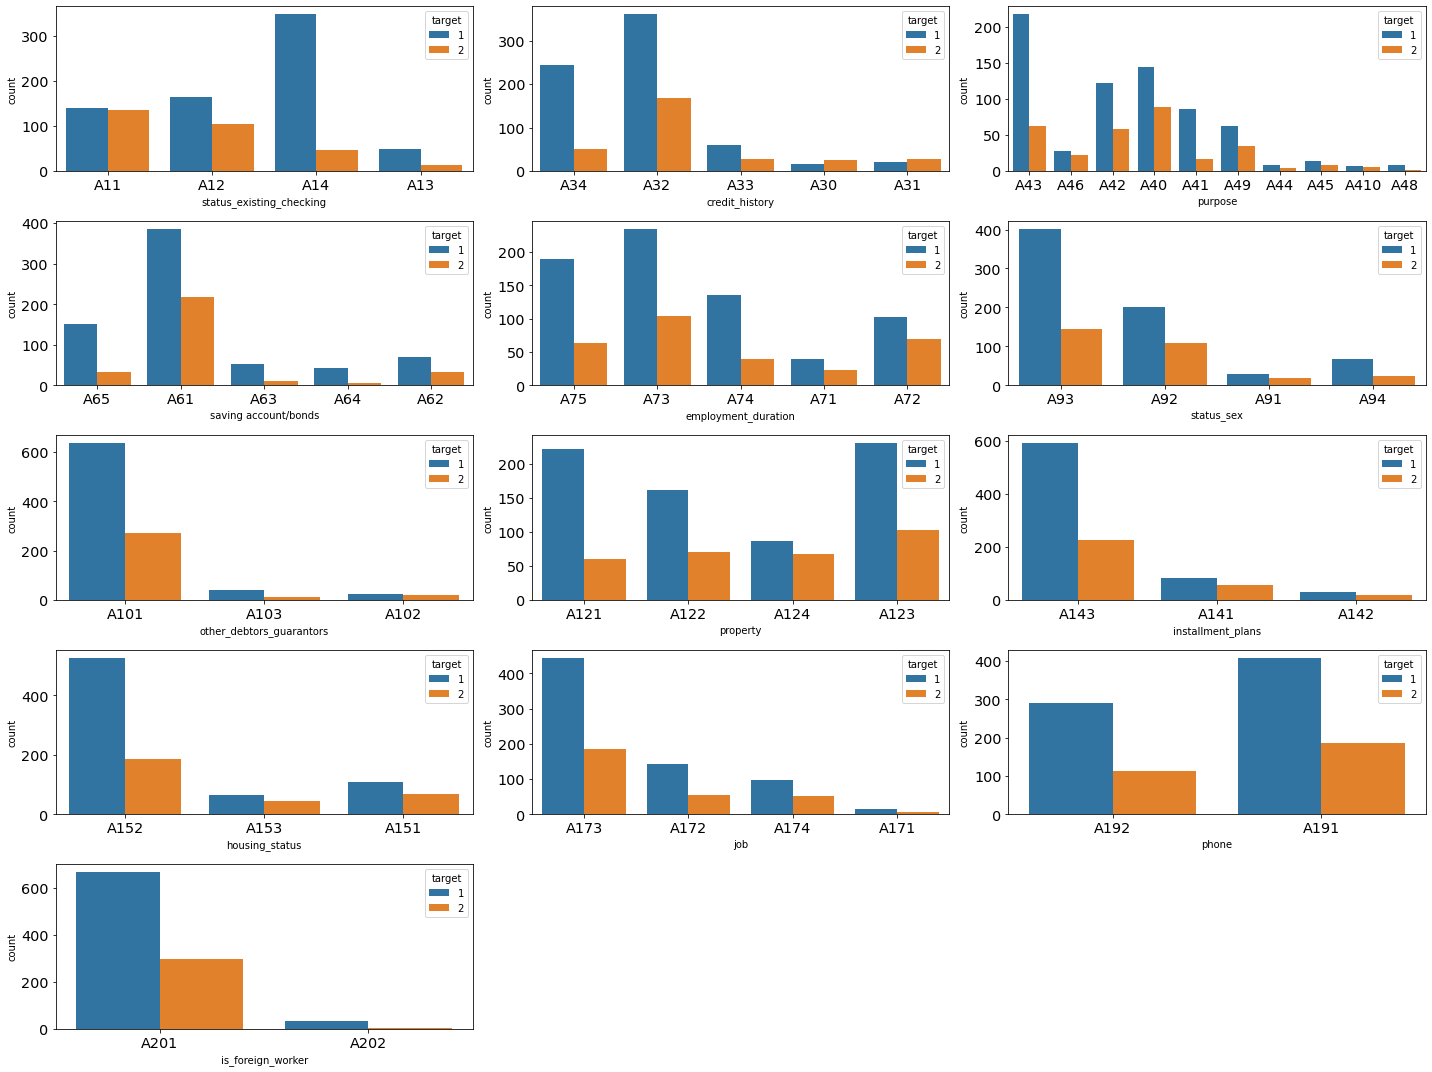

In [211]:
plt.figure(figsize=(20, 15))
for i in range(0, len(categoricals)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x = df[categoricals[i]], orient='v', hue=df['target'])
    plt.tight_layout()

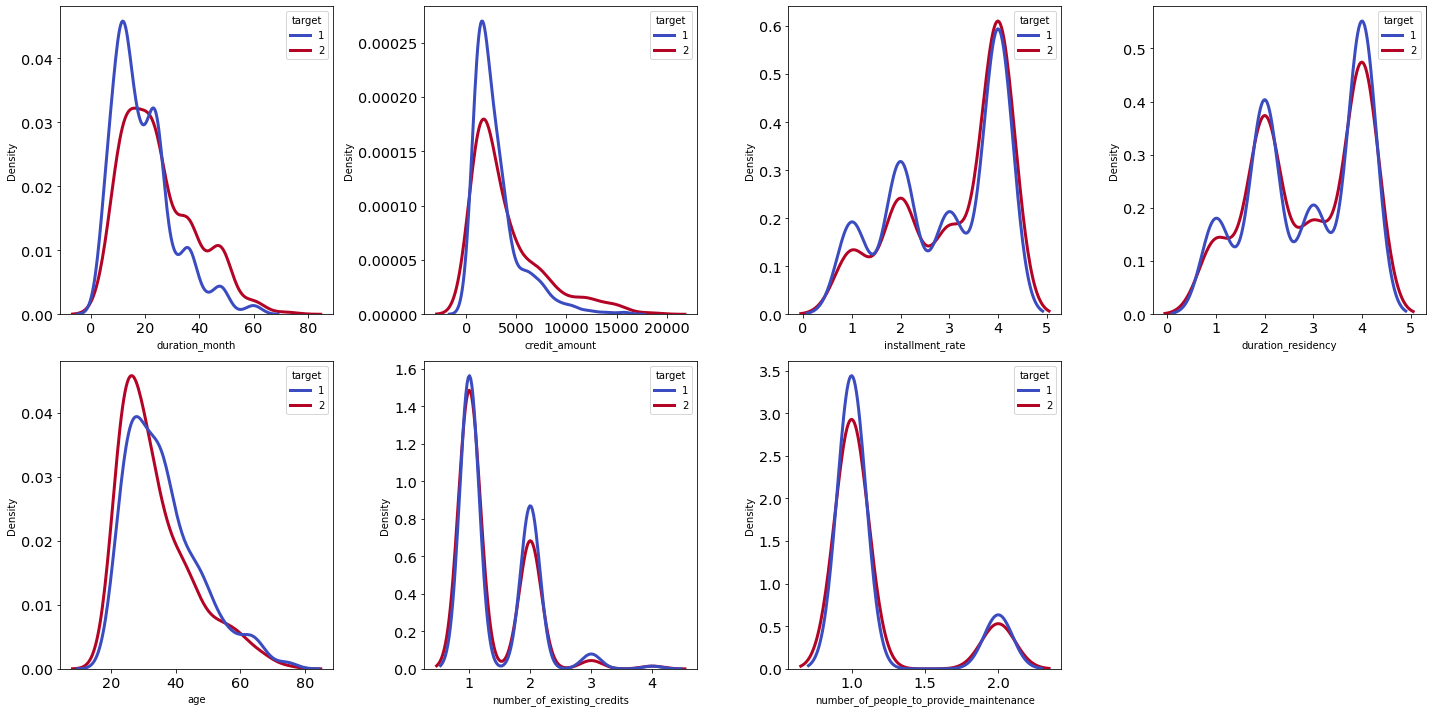

In [212]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numericals)):
  if i == len(numericals) - 1:
    continue
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x=df[numericals[i]], palette='coolwarm', hue=df['target'], common_norm=False)
  plt.xlabel(numericals[i])
  plt.tight_layout()

# Data Cleansing

## Outliers

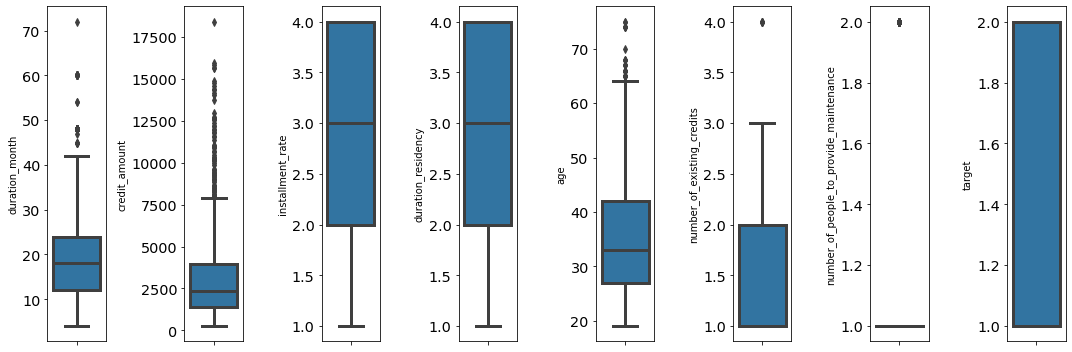

In [213]:
plt.figure(figsize=(15, 5))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]])
    plt.tight_layout()

Feature `age` won't be handled cause logically people aged 70++ y.o still make sense, so this time i will only handle the outlier for `duration_month` and `credit_amount`. this time I will be using the conservative method for reducing the outliers by using Z-Score method.

In [214]:
print(f'Rows before outlier handling: {len(df)}')
outlier_handled_features = ['duration_month', 'credit_amount']
for i in outlier_handled_features:
  zscore = np.abs(stats.zscore(df[i]))
  filtered_entries = (zscore < 3)
  df = df[filtered_entries]
print(f'Rows after outlier handling: {len(df)}')

Rows before outlier handling: 1000
Rows after outlier handling: 962


## Splitting Data into Train and Test

In [215]:
df_train,df_test = train_test_split(df,test_size=0.2, random_state=42)

## Feature Transformation

In [216]:
dataset = [df_train, df_test]

In [217]:
for i in dataset:
  i['log_duration_month'] = np.log(i['duration_month'])
  i['log_age'] = np.log(i['age'])
  i['log_credit_amount'] = np.log(i['credit_amount'])

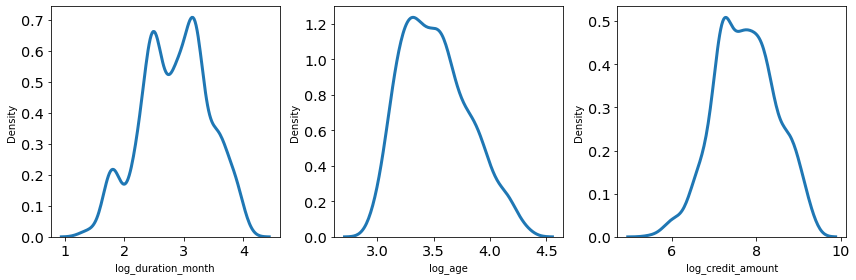

In [218]:
logged_feature = ['log_duration_month', 'log_age', 'log_credit_amount']
for i in range(0, len(logged_feature)):
  plt.subplot(1, 3, i+1)
  sns.kdeplot(x=df_train[logged_feature[i]], palette='coolwarm')
  plt.xlabel(logged_feature[i])
  plt.tight_layout()

In [219]:
future_dropped_columns = ['log_duration_month','log_age','log_credit_amount']

transform_feature = [
  'log_duration_month',
  'log_age',
  'log_credit_amount',
  'installment_rate',
  'duration_residency',
  'number_of_existing_credits',
  'number_of_people_to_provide_maintenance',
]

for i in transform_feature:
  for j in dataset:
    naming_normalize = i + "_norm"
    naming_standardize = i + "_std"
    future_dropped_columns.append(naming_normalize)
    j[naming_standardize] = StandardScaler().fit_transform(j[i].values.reshape(len(j), 1))
    j[naming_normalize] = MinMaxScaler().fit_transform(j[naming_standardize].values.reshape(len(j), 1))

In [220]:
future_dropped_columns = [i for n, i in enumerate(future_dropped_columns) if i not in future_dropped_columns[:n]]
for i,j in enumerate(numericals):
  if j == 'target':
    continue
  future_dropped_columns.append(j)

future_dropped_columns

['log_duration_month',
 'log_age',
 'log_credit_amount',
 'log_duration_month_norm',
 'log_age_norm',
 'log_credit_amount_norm',
 'installment_rate_norm',
 'duration_residency_norm',
 'number_of_existing_credits_norm',
 'number_of_people_to_provide_maintenance_norm',
 'duration_month',
 'credit_amount',
 'installment_rate',
 'duration_residency',
 'age',
 'number_of_existing_credits',
 'number_of_people_to_provide_maintenance']

In [221]:
for i in dataset:
  i.drop(columns=future_dropped_columns, inplace=True)

In [222]:
df_train.sample(5)

,status_existing_checking,credit_history,purpose,saving account/bonds,employment_duration,status_sex,other_debtors_guarantors,property,installment_plans,housing_status,...,phone,is_foreign_worker,target,log_duration_month_std,log_age_std,log_credit_amount_std,installment_rate_std,duration_residency_std,number_of_existing_credits_std,number_of_people_to_provide_maintenance_std
273,A12,A32,A43,A61,A74,A93,A101,A121,A143,A152,...,A191,A201,2,1.834772,-0.623598,0.401907,0.925233,1.044978,1.000002,-0.444769
463,A12,A32,A48,A65,A75,A93,A101,A122,A143,A152,...,A191,A201,1,-0.645000,0.407025,-1.539356,0.925233,1.044978,1.000002,-0.444769
112,A12,A32,A40,A61,A74,A93,A101,A121,A143,A151,...,A191,A201,1,0.080287,-0.623598,1.393847,0.028002,0.133880,-0.705102,-0.444769
153,A12,A34,A41,A64,A75,A92,A101,A124,A143,A151,...,A191,A201,1,0.594886,-0.505170,1.691173,-0.869229,1.044978,-0.705102,-0.444769
920,A14,A34,A42,A61,A73,A92,A101,A124,A143,A152,...,A191,A201,1,0.080287,-0.623598,-0.320435,0.925233,-0.777217,1.000002,-0.444769
